In [6]:
# importamos las librerías que necesitamos

# Tratamiento de datos
import pandas as pd
import numpy as np

# Imputación de nulos usando métodos avanzados estadísticos
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames
# pd.set_option('display.max_rows', None) # para poder visualizar todas las filas de los DataFrames

In [2]:
#Abrimos el csv y lo convertimos a un DataFrame.
df_HR = pd.read_csv('df_HR_limpio.csv', index_col= 0)
df_HR.head()

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DateBirth,RoleDepartament,RemoteWork
Age,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
51,No,NaN,684.0,NaN,6,3,NaN,"162,0",1,M,51.0,3,5,Research Director,3,NaN,19537.0,6462,7,Y,No,13,"3,0",3,NaN,0,NaN,5,"3,0",20,NaN,15,15,1972,NaN,Yes
52,No,NaN,699.0,NaN,1,4,Life Sciences,"259,0",3,M,65.0,2,5,Manager,3,NaN,19999.0,5678,0,NaN,NaN,14,"3,0",1,NaN,1,"34,0",5,"3,0",33,NaN,11,9,1971,NaN,1
42,No,travel_rarely,532.0,Research & Development,4,2,Technical Degree,"319,0",3,M,58.0,3,5,Manager,4,Married,19232.0,4933,1,NaN,No,11,"3,0",4,NaN,0,"22,0",3,NaN,22,NaN,11,15,1981,Manager - Research & Development,1
47,No,travel_rarely,359.0,NaN,2,4,Medical,NaN,1,F,82.0,3,4,Research Director,3,Married,17169.0,26703,3,Y,NaN,19,"3,0",2,NaN,2,NaN,2,NaN,20,NaN,5,6,1976,NaN,False
46,No,NaN,1319.0,NaN,3,3,Technical Degree,NaN,1,F,45.0,4,4,Sales Executive,1,Divorced,NaN,7739,2,Y,No,12,"3,0",4,NaN,1,NaN,5,"3,0",19,NaN,2,8,1977,NaN,0


In [3]:
df_HR.columns


Index(['Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'DateBirth', 'RoleDepartament', 'RemoteWork'],
      dtype='object')

In [4]:
# Comprobamos los valores únicos de cada columna

lista_columnas = ['Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'DateBirth', 'RoleDepartament', 'RemoteWork']

for col in lista_columnas:
    print(col)
    print(df_HR[col].unique())

Attrition
['No' 'Yes']
BusinessTravel
[nan 'travel_rarely' 'travel_frequently' 'non-travel']
DailyRate
[ 684.  699.  532.  359. 1319.  117. 1435.  635. 1276.  840.  247. 1369.
  201. 1360.  692. 1398.  286. 1402.  819.  884. 1238.  515. 1223.  202.
  928.  607.  266.  429.  589.   nan 1180. 1282.  776.  665.  526. 1034.
 1403. 1499.  580.  859.  263. 1376.  885. 1003. 1321.  394. 1372. 1333.
  228.  737.  823.  667.  301.  573. 1329.  630. 1063. 1017. 1296.  939.
 1355. 1448.  200. 1202.  404.  208.  813.  465. 1189. 1001. 1394.  161.
  288.  682. 1354.  147.  119. 1413.  452.  334. 1132.  982.  480. 1099.
  672. 1379.  583. 1492. 1050.  469.  237. 1440. 1291. 1157. 1336. 1224.
  735. 1389.  638. 1240.  194. 1339.  111. 1469.  470. 1232. 1249.  798.
  549.  570.  541.  164. 1117.  619.  319.  956. 1245. 1397.  527.  213.
  882.  330.  406.  217.  481.  669. 1465.  685. 1062.  177. 1199.  648.
  412.  282.  770.  601.  855.  332. 1326.  748.  405.  790.  971. 1370.
  750.  880.  678. 11

In [5]:
# Comprobamos el conteo de frecuencia de la columna EmployeeNumber. Varios números aparecen 2 veces repetidos.
# 
df_HR['EmployeeNumber'].value_counts()

482,0     2
530,0     2
507,0     2
517,0     2
522,0     2
         ..
161,0     1
164,0     1
190,0     1
194,0     1
2040,0    1
Name: EmployeeNumber, Length: 1079, dtype: int64

In [21]:
df_HR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1614 entries, 51 to 46
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition                 1614 non-null   object 
 1   BusinessTravel            842 non-null    object 
 2   DailyRate                 1490 non-null   float64
 3   Department                302 non-null    object 
 4   DistanceFromHome          1614 non-null   int64  
 5   Education                 1614 non-null   int64  
 6   EducationField            869 non-null    object 
 7   EmployeeNumber            1183 non-null   object 
 8   EnvironmentSatisfaction   1614 non-null   int64  
 9   Gender                    1614 non-null   object 
 10  HourlyRate                1530 non-null   float64
 11  JobInvolvement            1614 non-null   int64  
 12  JobLevel                  1614 non-null   int64  
 13  JobRole                   1614 non-null   object 
 14  JobSatisf

# Gestión de nulos en Columnas Categóricas

In [ ]:
# Calculamos el porcentaje de nulos que tenemos para cada columna categórica
porc_nulos = (df_HR.isnull().sum() / df_HR.shape[0]) * 100
porc_nulos

In [9]:
# Lo convertimos a DataFrame
df_nulos = pd.DataFrame(porc_nulos, columns = ["%_nulos"])

# Filtramos el DataFrame para quedarnos solo con aquellas columnas que tengan nulos
df_nulos[df_nulos["%_nulos"] > 0]

,%_nulos
BusinessTravel,47.831475
DailyRate,7.682776
Department,81.288724
EducationField,46.158612
EmployeeNumber,26.703841
HourlyRate,5.204461
MaritalStatus,40.334572
MonthlyIncome,52.230483
Over18,55.824040
OverTime,41.883519


In [11]:
# Obtenemos la lista de columnas categóricas que tienen nulos
nulos_esta_cat = df_HR[df_HR.columns[df_HR.isnull().any()]].select_dtypes(include = "O").columns
print("Las columnas categóricas que tienen nulos son : \n ")
print(nulos_esta_cat)

Las columnas categóricas que tienen nulos son : 
 
Index(['BusinessTravel', 'Department', 'EducationField', 'EmployeeNumber',
       'MaritalStatus', 'Over18', 'OverTime', 'PerformanceRating',
       'StandardHours', 'TotalWorkingYears', 'WorkLifeBalance',
       'YearsInCurrentRole', 'RoleDepartament'],
      dtype='object')


In [12]:
# Sacamos el 'value_counts()' de cada una de las columnas categóricas que tienen nulos para saber como es la distribución de sus categorías
for col in nulos_esta_cat:
    print(f"La distribución de las categorías para la columna {col.upper()}")
    display(df_HR[col].value_counts() / df_HR.shape[0])  # display es una función utilizada para mostrar objetos de manera más legible en Jupyter Notebooks o entornos similares. 
    print("........................")

La distribución de las categorías para la columna BUSINESSTRAVEL


travel_rarely        0.363073
travel_frequently    0.102230
non-travel           0.056382
Name: BusinessTravel, dtype: float64

........................
La distribución de las categorías para la columna DEPARTMENT


 Research & Development     0.121437
 Sales                      0.056382
 Human Resources            0.009294
Name: Department, dtype: float64

........................
La distribución de las categorías para la columna EDUCATIONFIELD


Life Sciences       0.216233
Medical             0.171004
Marketing           0.064436
Technical Degree    0.042751
Other               0.036555
Human Resources     0.007435
Name: EducationField, dtype: float64

........................
La distribución de las categorías para la columna EMPLOYEENUMBER


482,0     0.001239
530,0     0.001239
507,0     0.001239
517,0     0.001239
522,0     0.001239
            ...   
161,0     0.000620
164,0     0.000620
190,0     0.000620
194,0     0.000620
2040,0    0.000620
Name: EmployeeNumber, Length: 1079, dtype: float64

........................
La distribución de las categorías para la columna MARITALSTATUS


Married     0.271995
Single      0.201363
Divorced    0.123296
Name: MaritalStatus, dtype: float64

........................
La distribución de las categorías para la columna OVER18


Y    0.44176
Name: Over18, dtype: float64

........................
La distribución de las categorías para la columna OVERTIME


No     0.422553
Yes    0.158612
Name: OverTime, dtype: float64

........................
La distribución de las categorías para la columna PERFORMANCERATING


3,0    0.746592
4,0    0.132590
Name: PerformanceRating, dtype: float64

........................
La distribución de las categorías para la columna STANDARDHOURS


80,0    0.259603
Name: StandardHours, dtype: float64

........................
La distribución de las categorías para la columna TOTALWORKINGYEARS


10,0    0.089219
8,0     0.053284
6,0     0.052045
9,0     0.042751
5,0     0.040892
7,0     0.034696
4,0     0.033457
1,0     0.032838
12,0    0.021066
3,0     0.019827
14,0    0.018587
13,0    0.018587
11,0    0.017968
15,0    0.017348
16,0    0.017348
20,0    0.017348
18,0    0.016729
21,0    0.014250
17,0    0.013631
2,0     0.013011
22,0    0.011152
19,0    0.010533
24,0    0.008674
23,0    0.008055
28,0    0.008055
26,0    0.004957
0,0     0.004957
29,0    0.003717
36,0    0.003717
25,0    0.003717
33,0    0.003717
37,0    0.003098
27,0    0.003098
31,0    0.002478
30,0    0.001859
32,0    0.001859
35,0    0.001859
40,0    0.001859
34,0    0.001239
38,0    0.000620
Name: TotalWorkingYears, dtype: float64

........................
La distribución de las categorías para la columna WORKLIFEBALANCE


3,0    0.565675
2,0    0.222429
4,0    0.096035
1,0    0.048947
Name: WorkLifeBalance, dtype: float64

........................
La distribución de las categorías para la columna YEARSINCURRENTROLE


2,0     0.006815
7,0     0.003098
0,0     0.002478
4,0     0.001859
1,0     0.001859
11,0    0.001239
6,0     0.001239
3,0     0.001239
13,0    0.000620
12,0    0.000620
Name: YearsInCurrentRole, dtype: float64

........................
La distribución de las categorías para la columna ROLEDEPARTAMENT


 Sales Executive  -  Sales                                0.042751
 Research Scientist  -  Research & Development            0.038414
 Laboratory Technician  -  Research & Development         0.034696
 Healthcare Representative  -  Research & Development     0.016109
 Manufacturing Director  -  Research & Development        0.013631
 Sales Representative  -  Sales                           0.010533
 Research Director  -  Research & Development             0.009913
 Manager  -  Research & Development                       0.008674
 Human Resources  -  Human Resources                      0.008674
 Manager  -  Sales                                        0.003098
 Manager  -  Human Resources                              0.000620
Name: RoleDepartament, dtype: float64

........................


In [ ]:
# Con esta fórmula podemos ver la distribución de los valores de la columna que queramos

display(df_HR[col].value_counts() / df.shape[0]) 

In [ ]:
# ENTRE TODAS TENEMOS QUE VER CÓMO GESTIONAMOS LOS NULOS Y APLICAR EL CÓDIGO QUE HAY A CONTINUACIÓN

**Sustitución por moda y por el valor "desconocido**

In [ ]:
# Creamos dos listas, una con los nombres de las columnas que reemplazaremos por la moda y otra para las columnas que reemplazaremos 
# por una categoría nueva
# Hay que tener en cuenta que los valores de más abajo corresponden a otro csv. Habría que sustituirlos por los valores de df_HR.
columnas_moda = ["marital", "loan", "default"]
columnas_desconocido = ["job", "education", "housing", "contact_month", "date"]

In [ ]:
# Iteramos por la lista columnas_moda (en las que vamos a sustituir los valores nulos por la moda)
for columna in columnas_moda:
    
    # calculamos la moda para la columna por la que estamos iterando
    moda = df[columna].mode()[0]    
    
    # utilizando el método fillna reemplazamos los valores nulos por la moda calculada en el paso anterior. 
    df[columna] = df[columna].fillna(moda)

# por último chequeamos si se han eliminado los nulos en las columnas de "marital" y "loan"
print("Después del reemplazo usando 'fillna' quedan los siguientes nulos")

df[columnas_moda].isnull().sum()

In [ ]:
# Ahora hacemos lo mismo con la lista columnas_desconocido (en las que vamos a sustituir los nulos por el valor "Unknown")

for columna in columnas_desconocido:
    
    # reemplazamos los nulos por el valor Unknown para cada una de las columnas de la lista
    df[columna] = df[columna].fillna("Unknown")
    
# comprobamos si quedan nulos en las columnas categóricas. 
print("Después del reemplazo usando 'fillna' quedan los siguientes nulos")
df[columnas_desconocido].isnull().sum()

# Gestión de nulos en Columnas Numéricas

In [17]:
# Obtenemos la lista de columnas numericas que tienen nulos
nulos_esta_num = df_HR[df_HR.columns[df_HR.isnull().any()]].select_dtypes(include = np.number).columns
print("Las columnas numéricas que tienen nulos son : \n ")
print(nulos_esta_num)

Las columnas numéricas que tienen nulos son : 
 
Index(['DailyRate', 'HourlyRate', 'MonthlyIncome'], dtype='object')


In [18]:
# Calculamos el número de nulos que tenemos en cada una de las columnas numericas
df_HR[nulos_esta_num].isnull().sum() / df_HR.shape[0]

DailyRate        0.076828
HourlyRate       0.052045
MonthlyIncome    0.522305
dtype: float64

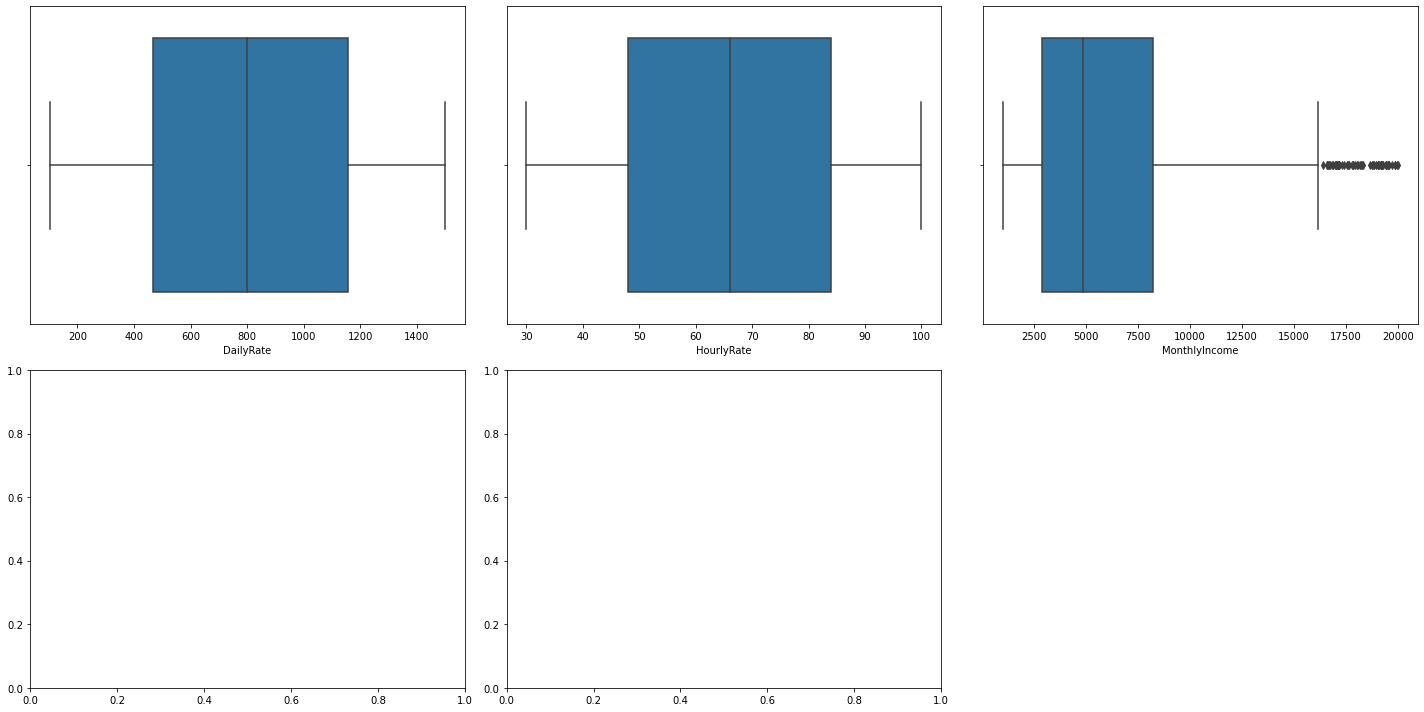

In [20]:
# Comprobamos si dentro de las columnas donde tenemos nulos tenemos valores atípicos. 

fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (20,10)) 

axes = axes.flat

for indice, col in enumerate(nulos_esta_num):
    sns.boxplot(x = col, data = df_HR, ax = axes[indice])
    
plt.tight_layout()
fig.delaxes(axes[-1]);